# Airbnb Data Analysis and Visualization

** by Won Chul Kang **

In [80]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import Imputer 
from bokeh.plotting import figure, output_file, show
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()
sns.set(style="whitegrid")

%matplotlib inline

##### Loading Data

In [2]:
usa = pd.read_csv("airbnb.csv")
france = pd.read_csv("airbnb_fr.csv")
korea = pd.read_csv("airbnb_kr.csv")

In [3]:
shape_us = usa.shape
shape_fr = france.shape
shape_kr = korea.shape

print("USA DataFrame has {r} rows and {c} columns".format(r=shape_us[0], c=shape_us[1]))
print("France DataFrame has {r} rows and {c} columns".format(r=shape_fr[0], c=shape_fr[1]))
print("Korea DataFrame has {r} rows and {c} columns".format(r=shape_kr[0], c=shape_kr[1]))

USA DataFrame has 299 rows and 9 columns
France DataFrame has 216 rows and 9 columns
Korea DataFrame has 282 rows and 9 columns


##### Creating Country Column

In [4]:
usa["Country"] = "USA"
france["Country"] = "France"
korea["Country"] = "Korea"

##### Combining DataFrames

In [5]:
usa_france = pd.merge(usa, france, how="outer")
airbnb = pd.merge(usa_france, korea, how="outer")

In [6]:
airbnb_shape = airbnb.shape

print("Combined DataFrame has {r} rows and {c} columns".format(r=airbnb_shape[0], c=airbnb_shape[1]))

Combined DataFrame has 797 rows and 10 columns


##### Missing values

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 796
Data columns (total 10 columns):
Name            797 non-null object
Location        796 non-null object
Hometype        797 non-null object
Max_guest       797 non-null object
Home_summary    797 non-null object
Price           797 non-null object
Amenities       797 non-null object
Reviewnumber    797 non-null int64
Reviewstar      797 non-null object
Country         797 non-null object
dtypes: int64(1), object(9)
memory usage: 68.5+ KB


In [8]:
airbnb.columns

Index(['Name', 'Location', 'Hometype', 'Max_guest', 'Home_summary', 'Price',
       'Amenities', 'Reviewnumber', 'Reviewstar', 'Country'],
      dtype='object')

In [9]:
airbnb["Name"].unique()
airbnb["Location"].unique()
airbnb["Hometype"].unique()
airbnb["Max_guest"].unique()
airbnb["Home_summary"].unique()
airbnb["Price"].unique()
airbnb["Amenities"].unique()
airbnb["Reviewnumber"].unique()
airbnb["Reviewstar"].unique()
airbnb["Country"].unique()

Output = None

##### There are values contains question marks(?)

In [10]:
airbnb["name_q"] = airbnb["Name"].str.find("?")

In [11]:
airbnb[airbnb["name_q"] != -1].shape

(63, 11)

In [12]:
airbnb["location_q"] = airbnb["Location"].str.find("?")

In [13]:
airbnb[airbnb["location_q"] != -1].shape

(27, 12)

In [14]:
airbnb["amenities_q"] = airbnb["Amenities"].str.find("?")

In [15]:
airbnb[airbnb["amenities_q"] != -1].shape

(7, 13)

** Name column has 63 values that contain question mark**

** Location column has 27 values that contain question mark **

** Amenities column has 7 values that contain question mark **

In [16]:
# I am going to replace question marks to empty string so i can drop less rows

airbnb = airbnb.replace('[?]', "", regex=True)

I converted question marks to empty string. I didn't want to delete every rows only because it contains question mark

In [17]:
# convert empty string value to np.nan

airbnb = airbnb.replace("", np.nan)

In [18]:
airbnb.columns[airbnb.isnull().any()] # location column has null values

Index(['Location', 'location_q'], dtype='object')

In [19]:
airbnb["Location"].isnull().value_counts()

False    773
True      24
Name: Location, dtype: int64

In [20]:
# drop null values

airbnb.dropna(inplace=True)

In [21]:
# dropping name_q, location_q, amenities_q columns

airbnb.drop(labels=["name_q", "location_q", "amenities_q"], axis=1, inplace=True)

In [22]:
airbnb.shape

(773, 10)

##### is there duplicated rows?

In [23]:
airbnb.duplicated().value_counts() # no duplicated rows

False    773
dtype: int64

##### Values to lower case 

In [24]:
airbnb["Name"] = airbnb["Name"].str.lower()
airbnb["Location"] = airbnb["Location"].str.lower()
airbnb["Hometype"] = airbnb["Hometype"].str.lower()
airbnb["Home_summary"] = airbnb["Home_summary"].str.lower()
airbnb["Amenities"] = airbnb["Amenities"].str.lower()
airbnb["Reviewstar"] = airbnb["Reviewstar"].str.lower()

In [25]:
airbnb

,Name,Location,Hometype,Max_guest,Home_summary,Price,Amenities,Reviewnumber,Reviewstar,Country
0,malibu dream airstream,malibu,camper/rv,3 guests,"['studio', '1 bed', '1 bath']",$650 per night,"['essentials', 'tv', 'wifi', 'free parking on ...",342,rating 5 out of 5,USA
1,the joshua tree house,joshua tree,entire house,6 guests,"['2 bedrooms', '2 beds', '2 baths']",$285 per night,"['kitchen', 'wifi', 'free parking on premises'...",343,rating 5 out of 5,USA
2,mushroom dome cabin: #1 on airbnb in the world,aptos,dome house,3 guests,"['1 bedroom', '2 beds', '1 bath']",$130 per night,"['kitchen', 'free parking on premises', 'wifi'...",1203,rating 5 out of 5,USA
3,cozy a-frame cabin in the redwoods,cazadero,entire house,2 guests,"['1 bedroom', '1 bed', '1 bath']",$175 per night,"['kitchen', 'wifi', 'free parking on premises'...",378,rating 5 out of 5,USA
4,underground hygge,orondo,earth house,2 guests,"['1 bedroom', '1 bed', '1 bath']",$200 per night,"['essentials', 'indoor fireplace', 'heating', ...",366,rating 5 out of 5,USA
5,off-grid ithouse,pioneertown,entire house,4 guests,"['2 bedrooms', '2 beds', '1 bath']",$400 per night,"['kitchen', 'free parking on premises', 'indoo...",211,rating 5 out of 5,USA
6,'silo studio' cottage,tyringham,entire guesthouse,2 guests,"['1 bedroom', '1 bed', '1 bath']",$225 per night,"['wifi', 'free parking on premises', 'shampoo'...",256,rating 5 out of 5,USA
7,dreamy tropical tree house,fern forest,island,2 guests,"['1 bedroom', '1 bed', '1 bath']",$220 per night,"['free parking on premises', 'hangers', 'shamp...",502,rating 5 out of 5,USA
8,joshua tree homesteader cabin,joshua tree,entire cabin,2 guests,"['1 bedroom', '1 bed', '1 bath']",$114 per night,"['kitchen', 'wifi', 'free parking on premises'...",678,rating 5 out of 5,USA
9,the lake tahoe chalet,south lake tahoe,entire chalet,8 guests,"['3 bedrooms', '5 beds', '2 baths']",$125 per night,"['kitchen', 'wifi', 'free parking on premises'...",172,rating 5 out of 5,USA


##### removing brackets 

In [26]:
airbnb["Home_summary"] = airbnb["Home_summary"].str.strip("[]")
airbnb["Amenities"] = airbnb["Amenities"].str.strip("[]")

In [27]:
airbnb

,Name,Location,Hometype,Max_guest,Home_summary,Price,Amenities,Reviewnumber,Reviewstar,Country
0,malibu dream airstream,malibu,camper/rv,3 guests,"'studio', '1 bed', '1 bath'",$650 per night,"'essentials', 'tv', 'wifi', 'free parking on p...",342,rating 5 out of 5,USA
1,the joshua tree house,joshua tree,entire house,6 guests,"'2 bedrooms', '2 beds', '2 baths'",$285 per night,"'kitchen', 'wifi', 'free parking on premises',...",343,rating 5 out of 5,USA
2,mushroom dome cabin: #1 on airbnb in the world,aptos,dome house,3 guests,"'1 bedroom', '2 beds', '1 bath'",$130 per night,"'kitchen', 'free parking on premises', 'wifi',...",1203,rating 5 out of 5,USA
3,cozy a-frame cabin in the redwoods,cazadero,entire house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$175 per night,"'kitchen', 'wifi', 'free parking on premises',...",378,rating 5 out of 5,USA
4,underground hygge,orondo,earth house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$200 per night,"'essentials', 'indoor fireplace', 'heating', '...",366,rating 5 out of 5,USA
5,off-grid ithouse,pioneertown,entire house,4 guests,"'2 bedrooms', '2 beds', '1 bath'",$400 per night,"'kitchen', 'free parking on premises', 'indoor...",211,rating 5 out of 5,USA
6,'silo studio' cottage,tyringham,entire guesthouse,2 guests,"'1 bedroom', '1 bed', '1 bath'",$225 per night,"'wifi', 'free parking on premises', 'shampoo',...",256,rating 5 out of 5,USA
7,dreamy tropical tree house,fern forest,island,2 guests,"'1 bedroom', '1 bed', '1 bath'",$220 per night,"'free parking on premises', 'hangers', 'shampo...",502,rating 5 out of 5,USA
8,joshua tree homesteader cabin,joshua tree,entire cabin,2 guests,"'1 bedroom', '1 bed', '1 bath'",$114 per night,"'kitchen', 'wifi', 'free parking on premises',...",678,rating 5 out of 5,USA
9,the lake tahoe chalet,south lake tahoe,entire chalet,8 guests,"'3 bedrooms', '5 beds', '2 baths'",$125 per night,"'kitchen', 'wifi', 'free parking on premises',...",172,rating 5 out of 5,USA


##### Extracting numeric values from columns

In [28]:
airbnb["Max_guest_num"] = airbnb["Max_guest"].str.extract("(\d)").astype("int")
airbnb["Price_num"] = airbnb["Price"].str.extract("(\d+)").astype("float")
airbnb["Reviewstar_num"] = airbnb["Reviewstar"].str.extract("(\d)").astype("int")

In [29]:
airbnb

,Name,Location,Hometype,Max_guest,Home_summary,Price,Amenities,Reviewnumber,Reviewstar,Country,Max_guest_num,Price_num,Reviewstar_num
0,malibu dream airstream,malibu,camper/rv,3 guests,"'studio', '1 bed', '1 bath'",$650 per night,"'essentials', 'tv', 'wifi', 'free parking on p...",342,rating 5 out of 5,USA,3,650.0,5
1,the joshua tree house,joshua tree,entire house,6 guests,"'2 bedrooms', '2 beds', '2 baths'",$285 per night,"'kitchen', 'wifi', 'free parking on premises',...",343,rating 5 out of 5,USA,6,285.0,5
2,mushroom dome cabin: #1 on airbnb in the world,aptos,dome house,3 guests,"'1 bedroom', '2 beds', '1 bath'",$130 per night,"'kitchen', 'free parking on premises', 'wifi',...",1203,rating 5 out of 5,USA,3,130.0,5
3,cozy a-frame cabin in the redwoods,cazadero,entire house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$175 per night,"'kitchen', 'wifi', 'free parking on premises',...",378,rating 5 out of 5,USA,2,175.0,5
4,underground hygge,orondo,earth house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$200 per night,"'essentials', 'indoor fireplace', 'heating', '...",366,rating 5 out of 5,USA,2,200.0,5
5,off-grid ithouse,pioneertown,entire house,4 guests,"'2 bedrooms', '2 beds', '1 bath'",$400 per night,"'kitchen', 'free parking on premises', 'indoor...",211,rating 5 out of 5,USA,4,400.0,5
6,'silo studio' cottage,tyringham,entire guesthouse,2 guests,"'1 bedroom', '1 bed', '1 bath'",$225 per night,"'wifi', 'free parking on premises', 'shampoo',...",256,rating 5 out of 5,USA,2,225.0,5
7,dreamy tropical tree house,fern forest,island,2 guests,"'1 bedroom', '1 bed', '1 bath'",$220 per night,"'free parking on premises', 'hangers', 'shampo...",502,rating 5 out of 5,USA,2,220.0,5
8,joshua tree homesteader cabin,joshua tree,entire cabin,2 guests,"'1 bedroom', '1 bed', '1 bath'",$114 per night,"'kitchen', 'wifi', 'free parking on premises',...",678,rating 5 out of 5,USA,2,114.0,5
9,the lake tahoe chalet,south lake tahoe,entire chalet,8 guests,"'3 bedrooms', '5 beds', '2 baths'",$125 per night,"'kitchen', 'wifi', 'free parking on premises',...",172,rating 5 out of 5,USA,8,125.0,5


##### Converting data types

In [30]:
airbnb.dtypes

Name               object
Location           object
Hometype           object
Max_guest          object
Home_summary       object
Price              object
Amenities          object
Reviewnumber        int64
Reviewstar         object
Country            object
Max_guest_num       int32
Price_num         float64
Reviewstar_num      int32
dtype: object

Hometype column to category data type

In [36]:
airbnb["Hometype"].unique()
airbnb["Hometype"] = airbnb["Hometype"].astype("category")

Max_guest column to category data type

In [38]:
airbnb["Max_guest"].unique()
airbnb["Max_guest"] = airbnb["Max_guest"].astype("category")

Reviewstar column to category data type

In [44]:
airbnb["Reviewstar"].unique()
airbnb["Reviewstar"] = airbnb["Reviewstar"].astype("category")

Country column to category data type

In [47]:
airbnb["Country"].unique()
airbnb["Country"] = airbnb["Country"].astype("category")

In [51]:
airbnb.info() # Memory usage is also reduced

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 795
Data columns (total 13 columns):
Name              773 non-null object
Location          773 non-null object
Hometype          773 non-null category
Max_guest         773 non-null category
Home_summary      773 non-null object
Price             773 non-null object
Amenities         773 non-null object
Reviewnumber      773 non-null int64
Reviewstar        773 non-null category
Country           773 non-null category
Max_guest_num     773 non-null int32
Price_num         773 non-null float64
Reviewstar_num    773 non-null int32
dtypes: category(4), float64(1), int32(2), int64(1), object(5)
memory usage: 59.9+ KB


In [52]:
airbnb

,Name,Location,Hometype,Max_guest,Home_summary,Price,Amenities,Reviewnumber,Reviewstar,Country,Max_guest_num,Price_num,Reviewstar_num
0,malibu dream airstream,malibu,camper/rv,3 guests,"'studio', '1 bed', '1 bath'",$650 per night,"'essentials', 'tv', 'wifi', 'free parking on p...",342,rating 5 out of 5,USA,3,650.0,5
1,the joshua tree house,joshua tree,entire house,6 guests,"'2 bedrooms', '2 beds', '2 baths'",$285 per night,"'kitchen', 'wifi', 'free parking on premises',...",343,rating 5 out of 5,USA,6,285.0,5
2,mushroom dome cabin: #1 on airbnb in the world,aptos,dome house,3 guests,"'1 bedroom', '2 beds', '1 bath'",$130 per night,"'kitchen', 'free parking on premises', 'wifi',...",1203,rating 5 out of 5,USA,3,130.0,5
3,cozy a-frame cabin in the redwoods,cazadero,entire house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$175 per night,"'kitchen', 'wifi', 'free parking on premises',...",378,rating 5 out of 5,USA,2,175.0,5
4,underground hygge,orondo,earth house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$200 per night,"'essentials', 'indoor fireplace', 'heating', '...",366,rating 5 out of 5,USA,2,200.0,5
5,off-grid ithouse,pioneertown,entire house,4 guests,"'2 bedrooms', '2 beds', '1 bath'",$400 per night,"'kitchen', 'free parking on premises', 'indoor...",211,rating 5 out of 5,USA,4,400.0,5
6,'silo studio' cottage,tyringham,entire guesthouse,2 guests,"'1 bedroom', '1 bed', '1 bath'",$225 per night,"'wifi', 'free parking on premises', 'shampoo',...",256,rating 5 out of 5,USA,2,225.0,5
7,dreamy tropical tree house,fern forest,island,2 guests,"'1 bedroom', '1 bed', '1 bath'",$220 per night,"'free parking on premises', 'hangers', 'shampo...",502,rating 5 out of 5,USA,2,220.0,5
8,joshua tree homesteader cabin,joshua tree,entire cabin,2 guests,"'1 bedroom', '1 bed', '1 bath'",$114 per night,"'kitchen', 'wifi', 'free parking on premises',...",678,rating 5 out of 5,USA,2,114.0,5
9,the lake tahoe chalet,south lake tahoe,entire chalet,8 guests,"'3 bedrooms', '5 beds', '2 baths'",$125 per night,"'kitchen', 'wifi', 'free parking on premises',...",172,rating 5 out of 5,USA,8,125.0,5


# EDA and visualization

##### What is average price in each of countries?

In [65]:
airbnb.groupby(by=["Country"]).agg({"Price_num": "mean"}).rename(columns={"Price_num": "Average Price"})

,Average Price
Country,
France,118.370370
Korea,44.744186
USA,128.023411


As you can see, USA has highest average price and Korea has lowest average price

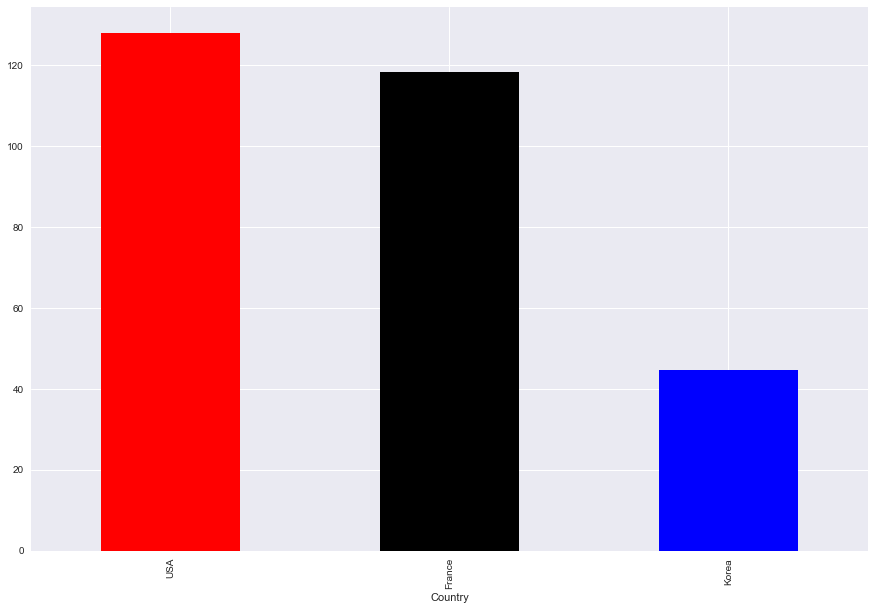

In [133]:
airbnb.groupby("Country")["Price_num"].mean().sort_values(ascending=False).plot.bar(color=["red","black","blue"]);

what is lowest price in each of countries?

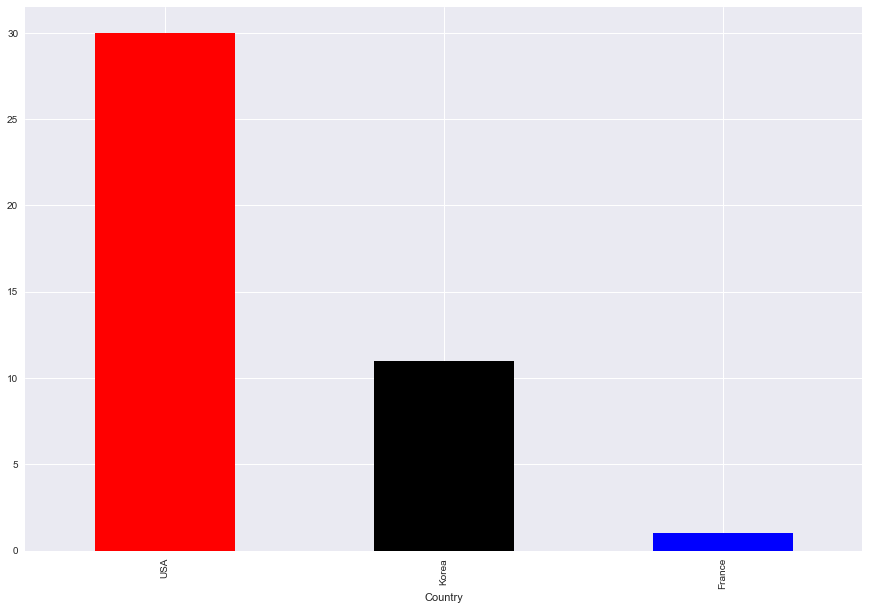

In [132]:
airbnb.groupby("Country")["Price_num"].min().sort_values(ascending=False).plot.bar(color=["red","black","blue"]);

what is highest price?

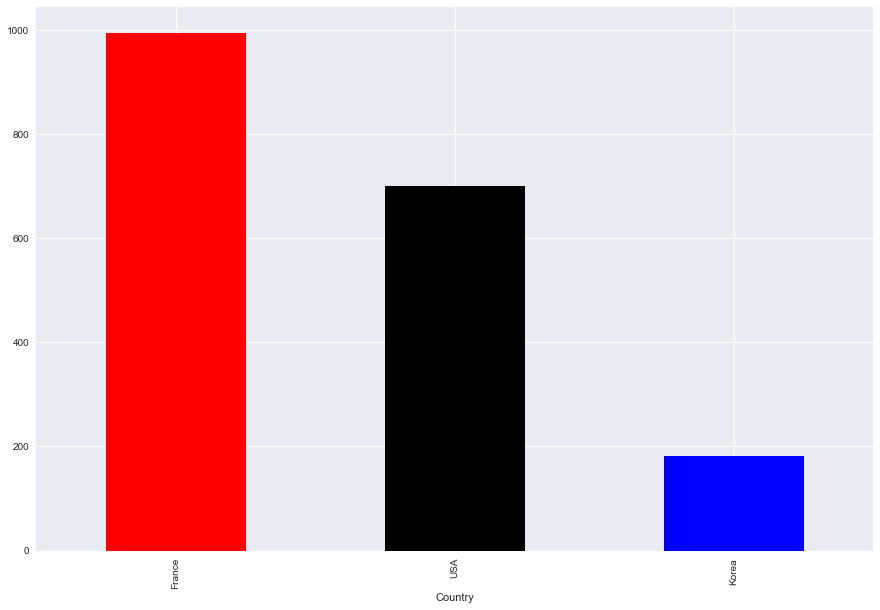

In [131]:
airbnb.groupby("Country")["Price_num"].max().sort_values(ascending=False).plot.bar(color=["red","black","blue"]);

In [143]:
korea_ = airbnb[airbnb["Country"] == "Korea"].reset_index().copy()
usa_ = airbnb[airbnb["Country"] == "USA"].reset_index().copy()
france_ = airbnb[airbnb["Country"] == "France"].reset_index().copy()

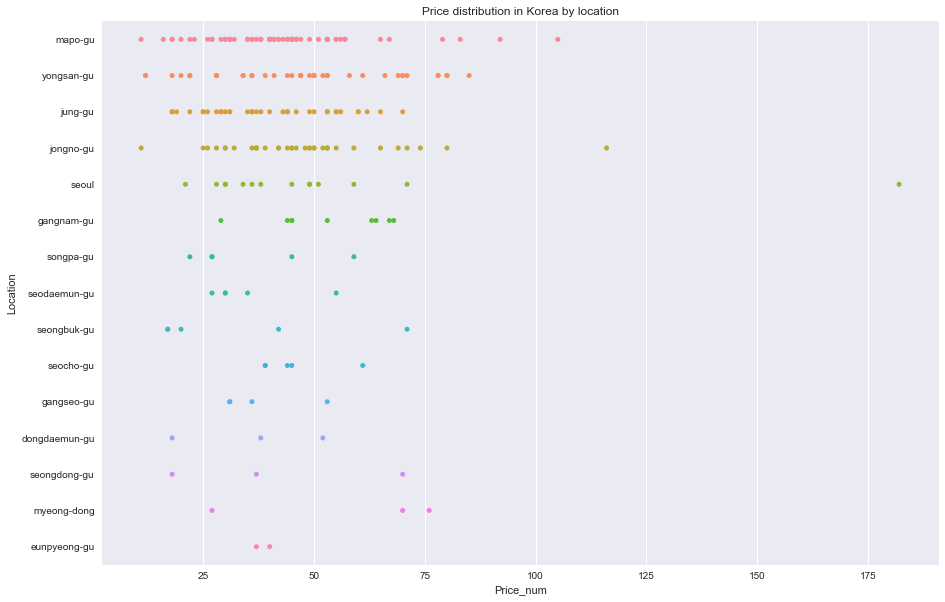

In [140]:
sns.stripplot(x="Price_num", y="Location", data=korea_
             , order=korea_["Location"].value_counts().iloc[:15].index).set_title("Price distribution in Korea by location");

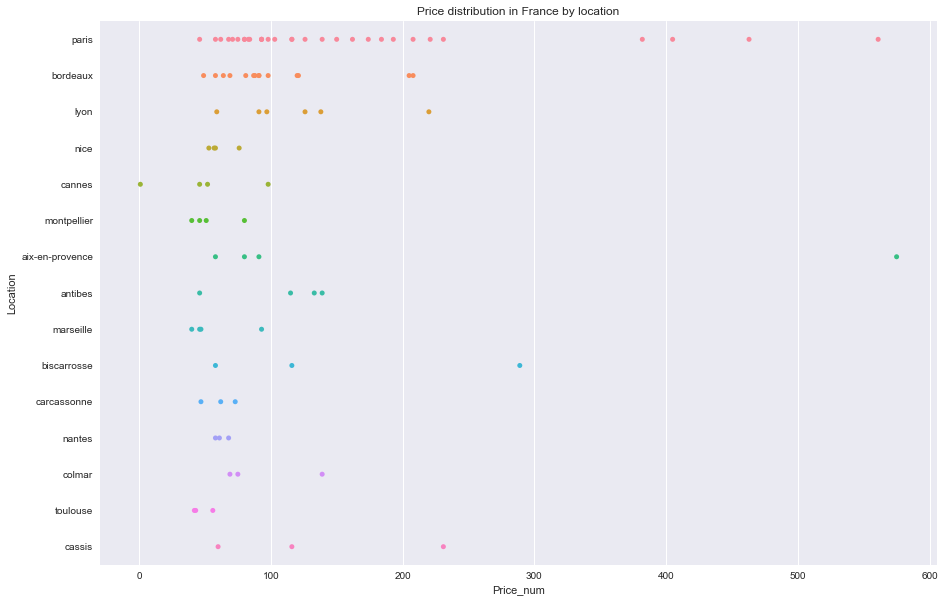

In [141]:
sns.stripplot(x="Price_num", y="Location", data=france_
             , order=france_["Location"].value_counts().iloc[:15].index).set_title("Price distribution in France by location");

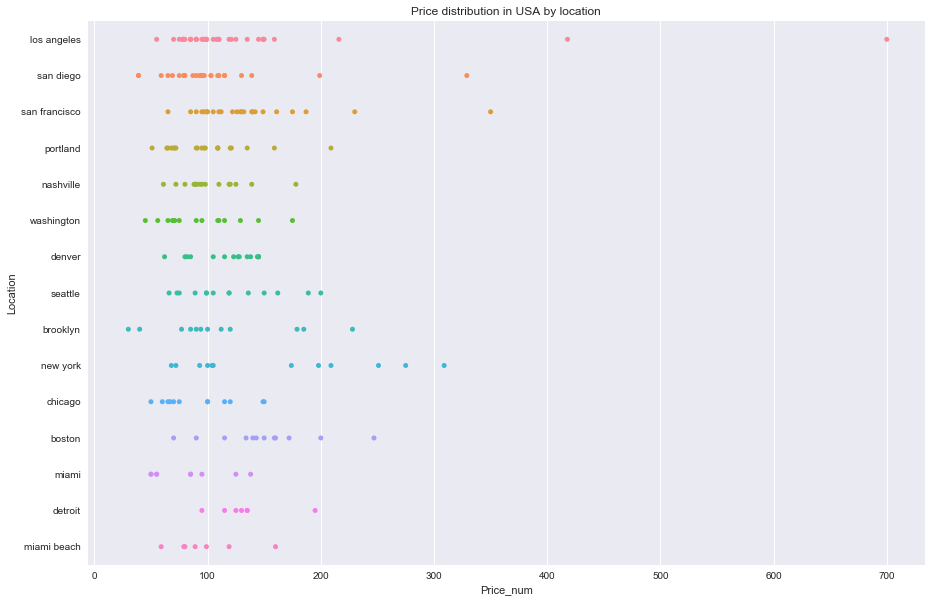

In [142]:
sns.stripplot(x="Price_num", y="Location", data=usa_
             , order=usa_["Location"].value_counts().iloc[:15].index).set_title("Price distribution in USA by location");

##### Is there correlation between columns?

In [75]:
corr = airbnb.corr()
print(corr)

                Reviewnumber  Max_guest_num  Price_num  Reviewstar_num
Reviewnumber        1.000000      -0.054969   0.125273        0.105727
Max_guest_num      -0.054969       1.000000   0.045057       -0.023891
Price_num           0.125273       0.045057   1.000000        0.133265
Reviewstar_num      0.105727      -0.023891   0.133265        1.000000


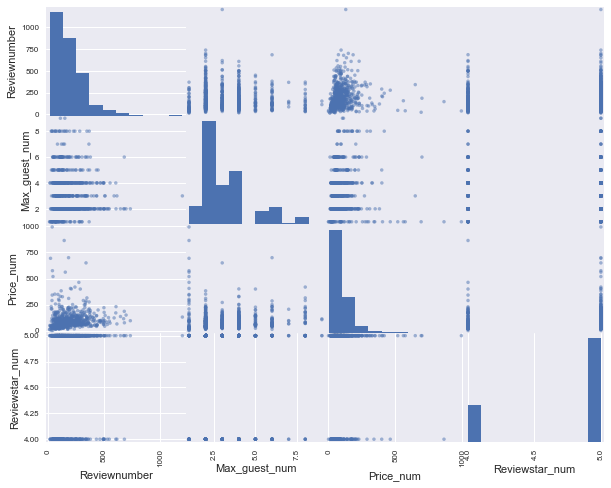

In [134]:
scatter_matrix(airbnb)
plt.gcf().set_size_inches(10, 8)
plt.show();

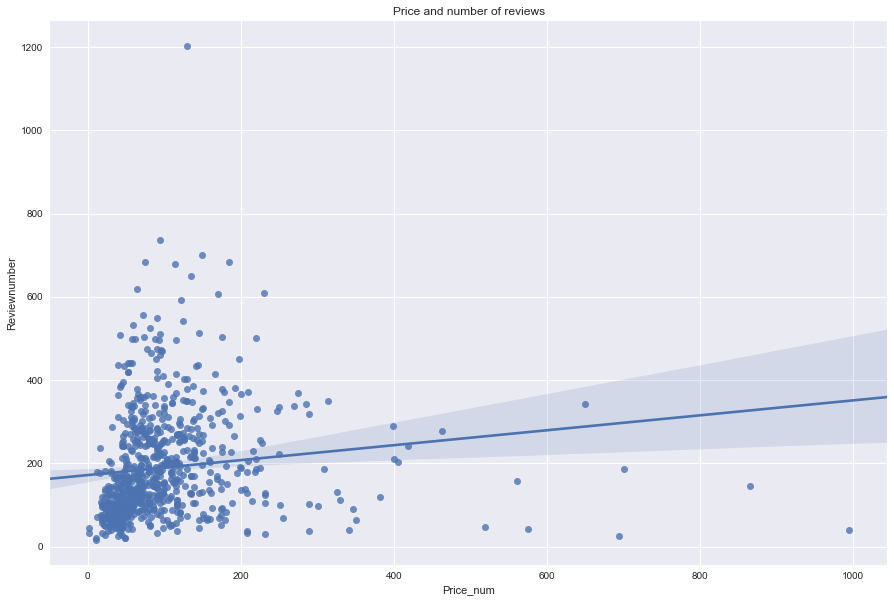

In [104]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.regplot(x="Price_num", y="Reviewnumber",data=airbnb).set_title("Price and number of reviews");

##### What is distribution of each of columns

In [105]:
airbnb.head()

,Name,Location,Hometype,Max_guest,Home_summary,Price,Amenities,Reviewnumber,Reviewstar,Country,Max_guest_num,Price_num,Reviewstar_num
0,malibu dream airstream,malibu,camper/rv,3 guests,"'studio', '1 bed', '1 bath'",$650 per night,"'essentials', 'tv', 'wifi', 'free parking on p...",342,rating 5 out of 5,USA,3,650.0,5
1,the joshua tree house,joshua tree,entire house,6 guests,"'2 bedrooms', '2 beds', '2 baths'",$285 per night,"'kitchen', 'wifi', 'free parking on premises',...",343,rating 5 out of 5,USA,6,285.0,5
2,mushroom dome cabin: #1 on airbnb in the world,aptos,dome house,3 guests,"'1 bedroom', '2 beds', '1 bath'",$130 per night,"'kitchen', 'free parking on premises', 'wifi',...",1203,rating 5 out of 5,USA,3,130.0,5
3,cozy a-frame cabin in the redwoods,cazadero,entire house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$175 per night,"'kitchen', 'wifi', 'free parking on premises',...",378,rating 5 out of 5,USA,2,175.0,5
4,underground hygge,orondo,earth house,2 guests,"'1 bedroom', '1 bed', '1 bath'",$200 per night,"'essentials', 'indoor fireplace', 'heating', '...",366,rating 5 out of 5,USA,2,200.0,5


What are top 15 locations for each countries?

Top 15 location in Korea

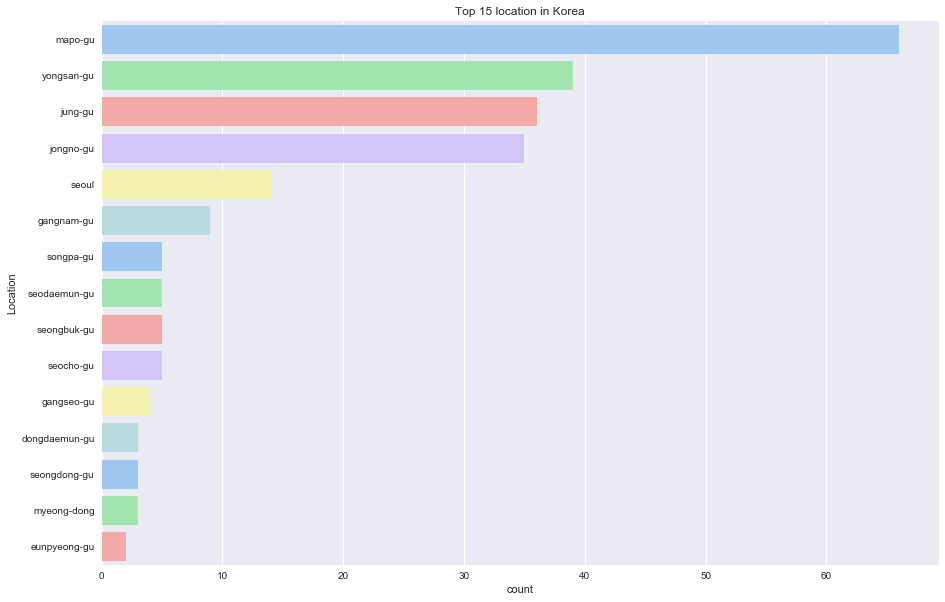

In [121]:
sns.countplot(y="Location", palette="pastel",data=korea_
             , order=korea_["Location"].value_counts().iloc[:15]
              .index).set_title("Top 15 location in Korea");

Top 15 location in France

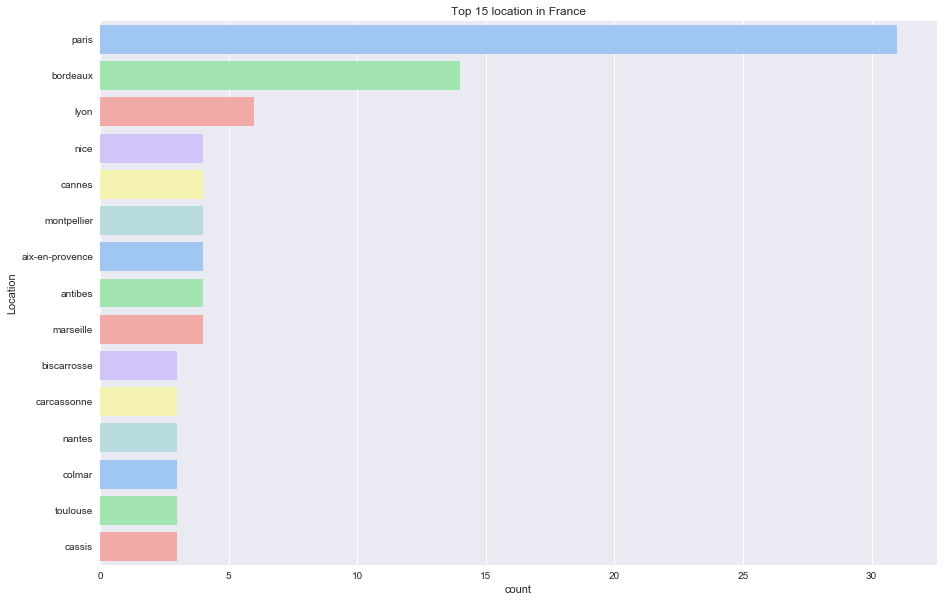

In [124]:
sns.countplot(y="Location", palette="pastel",data=france_
             , order=france_["Location"].value_counts().iloc[:15]
              .index).set_title("Top 15 location in France");

Top 15 location in USA

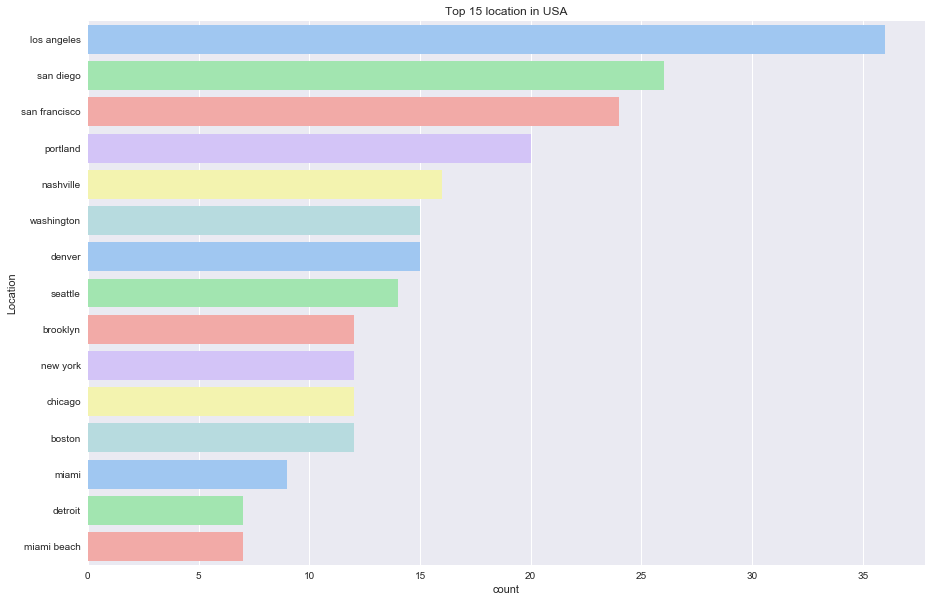

In [123]:
sns.countplot(y="Location", palette="pastel",data=usa_
             , order=usa_["Location"].value_counts().iloc[:15]
              .index).set_title("Top 15 location in USA");

What are most popular hometypes?

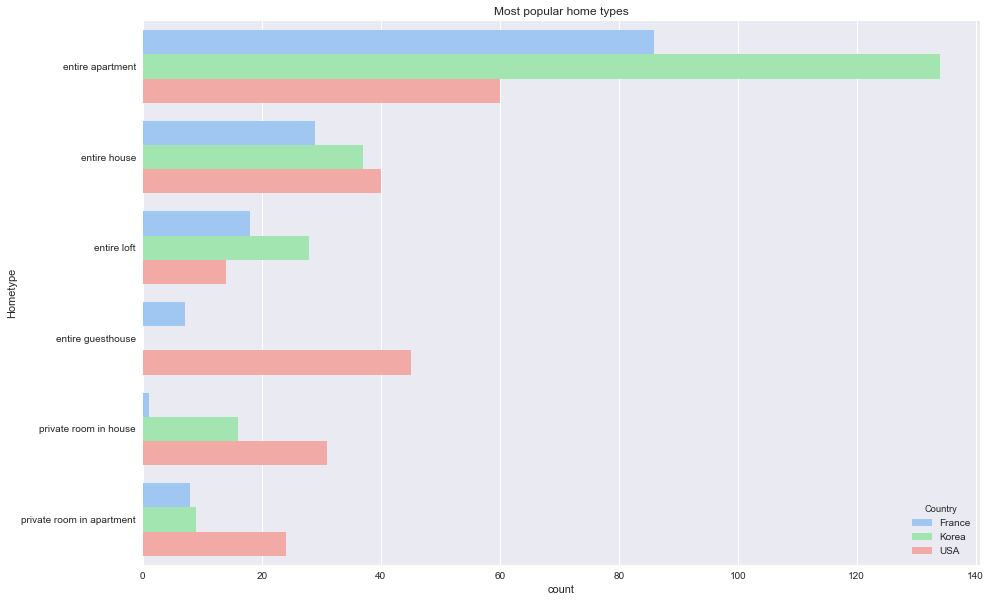

In [130]:
sns.countplot(y="Hometype", hue="Country",palette="pastel",data=airbnb
             , order=airbnb["Hometype"].value_counts().iloc[:6]
              .index).set_title("Most popular home types");